<a href="https://colab.research.google.com/github/mg253a/Challenge_Telecom_-X_MG/blob/main/Telecom_data_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de Datos de Telecom X**

# Proyecto: Análisis de Evasión de Clientes - Telecom X


In [137]:
# ===============================
# 📦 EXTRACCIÓN DE DATOS
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
# Paso 1: Cargar datos desde la API (JSON en GitHub)
url = 'https://raw.githubusercontent.com/mg253a/Challenge_Telecom_-X_MG/main/TelecomX_Data.json'
df = pd.read_json(url)

In [139]:
# Paso 2: Confirmar estructura inicial
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [140]:
# ===============================
# 🔧 TRANSFORMACIÓN Y LIMPIEZA DE DATOS
# ===============================

# Revisión general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


In [141]:
# Tipos de datos y descripción general
print(df.describe(include='all'))

        customerID Churn                                           customer  \
count         7267  7267                                               7267   
unique        7267     3                                                891   
top     9995-HOTOH    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
freq             1  5174                                                223   

                                                 phone  \
count                                             7267   
unique                                               3   
top     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
freq                                              3495   

                                                 internet  \
count                                                7267   
unique                                                129   
top     {'InternetService': 'No', 'OnlineSecurity': 'N...   
freq                                                 1581   

       

In [142]:
#Normalizar textos

from pandas import json_normalize

df = json_normalize(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [143]:
# Eliminar duplicados
print("Duplicados eliminados:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicados eliminados: 0


In [144]:
# Normalizar textos en columnas categóricas
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()

In [145]:
# Valores nulos
print("Valores nulos:\n", df.isnull().sum())

Valores nulos:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [146]:
# Convertir valores numéricos erróneos
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [148]:
# Rellenar valores nulos si es necesario
df['account.Charges.Monthly'].fillna(df['account.Charges.Monthly'].mean(), inplace=True)
df['account.Charges.Total'].fillna(df['account.Charges.Total'].mean(), inplace=True)

/tmp/ipython-input-148-1055073861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Monthly'].fillna(df['account.Charges.Monthly'].mean(), inplace=True)
/tmp/ipython-input-148-1055073861.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [149]:
#Eliminando las columnas de Churn
df = df[df['Churn'].str.strip() !='']
print("Numero de filas después de eliminar las vacías en 'Churn':", len(df))

Numero de filas después de eliminar las vacías en 'Churn': 7043


In [150]:
# ===============================
# ➗ NUEVA COLUMNA: Cuentas_Diarias
# ===============================
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

/tmp/ipython-input-150-1694342191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30


**CARGA Y ANALISIS**

In [151]:
# ===============================
# 📊 ANÁLISIS DESCRIPTIVO
# ===============================
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.296277,2.158723
std,0.368612,24.559481,30.090047,2265.000260,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,402.225000,1.183333
50%,0.000000,29.000000,70.350000,1400.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


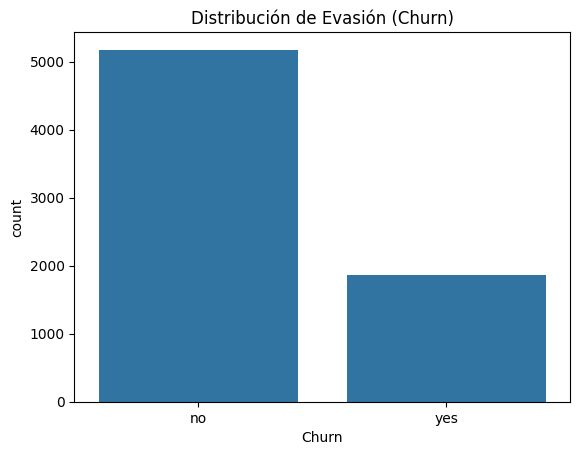

In [152]:
# ===============================
# 📈 DISTRIBUCIÓN DE EVASIÓN
# ===============================
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Evasión (Churn)')
plt.show()


In [153]:
# ===============================
# 📊 Evasión por variables categóricas
# ===============================
cat_cols = ['customer.gender', 'customer.Partner', 'customer.Dependents', 'account.Contract', 'account.PaymentMethod',
    'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity',
    'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies']

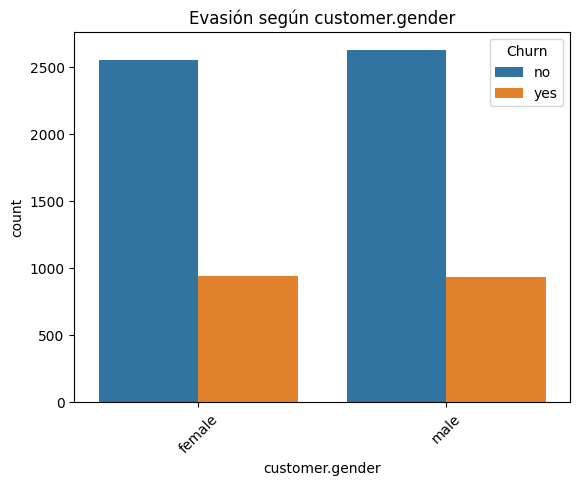

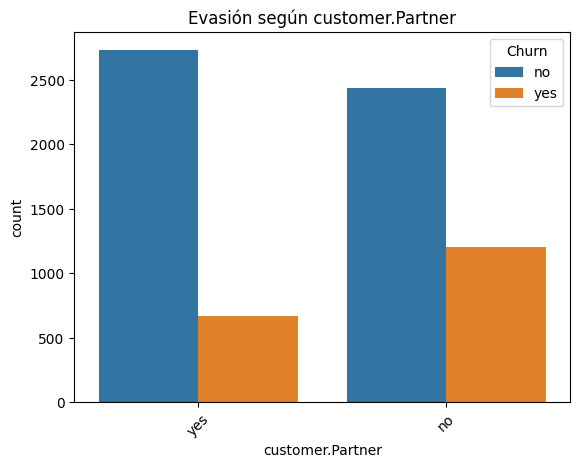

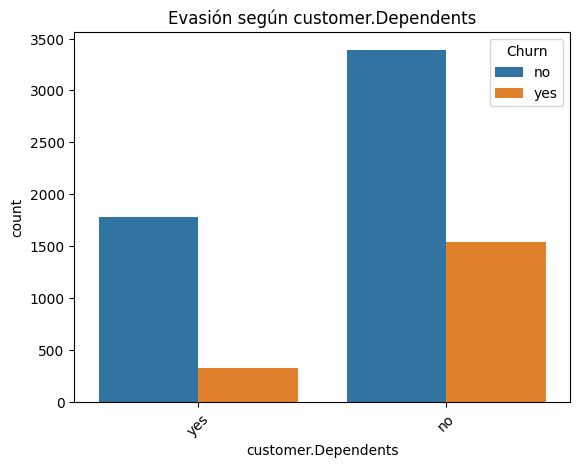

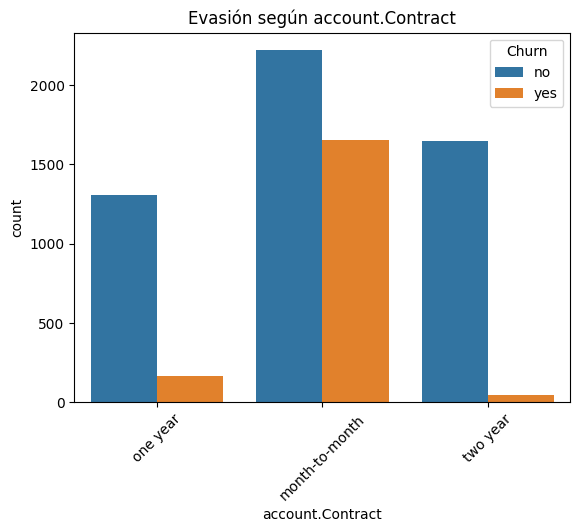

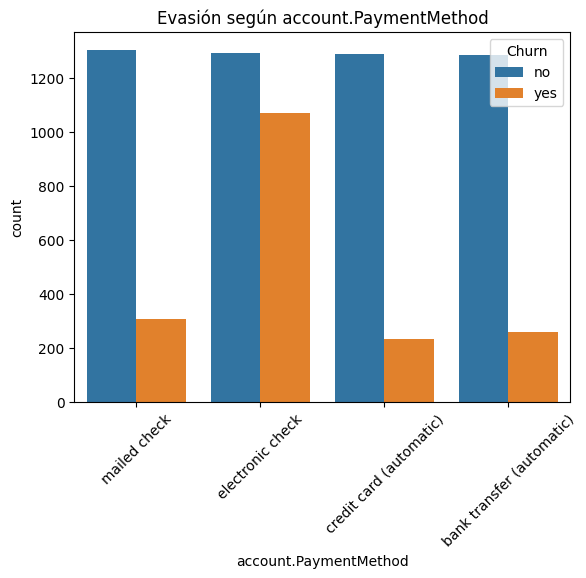

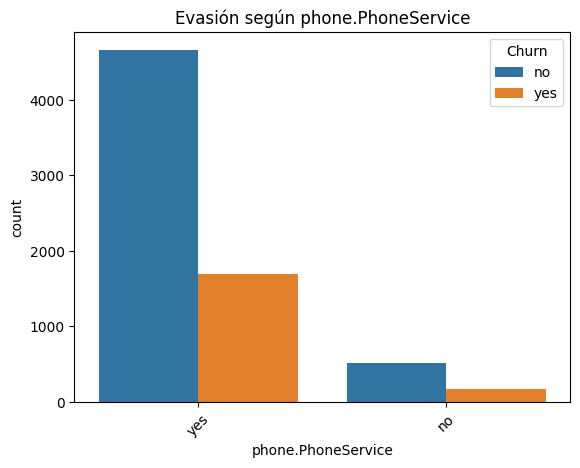

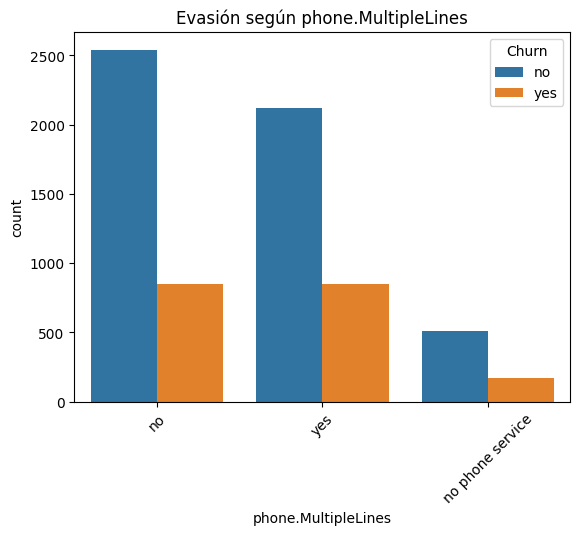

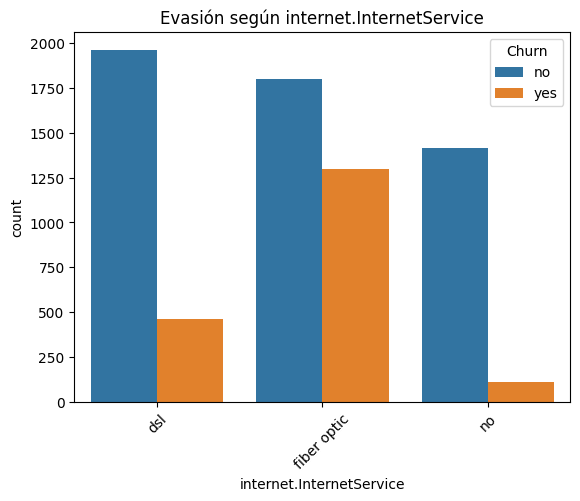

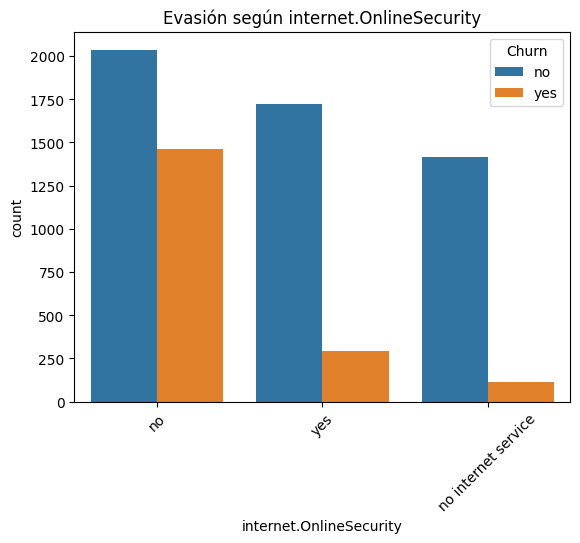

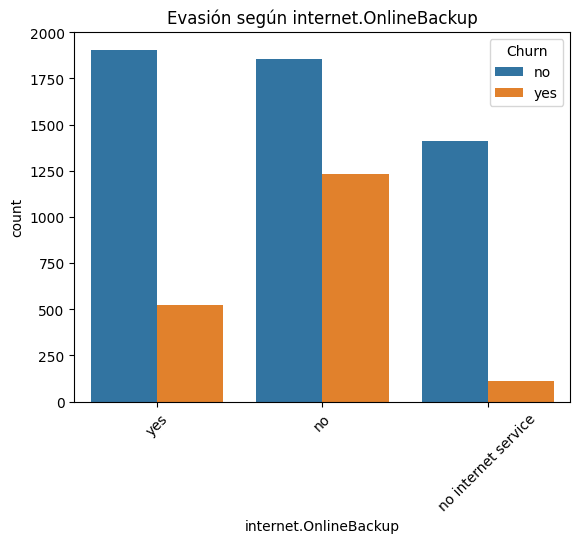

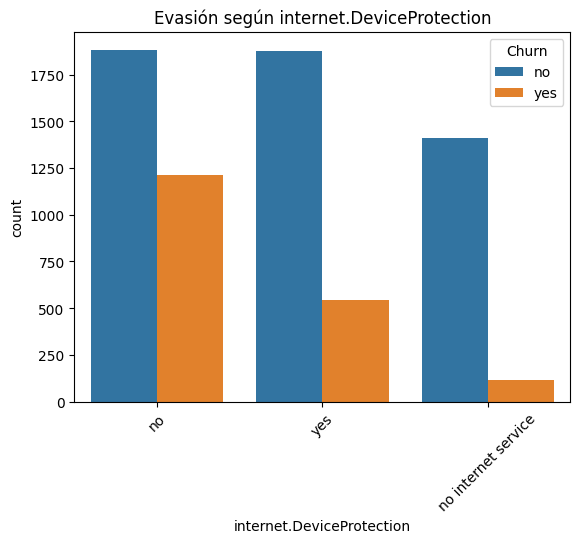

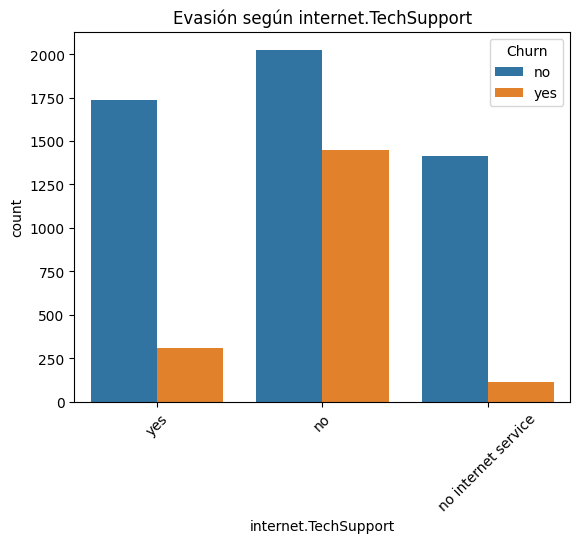

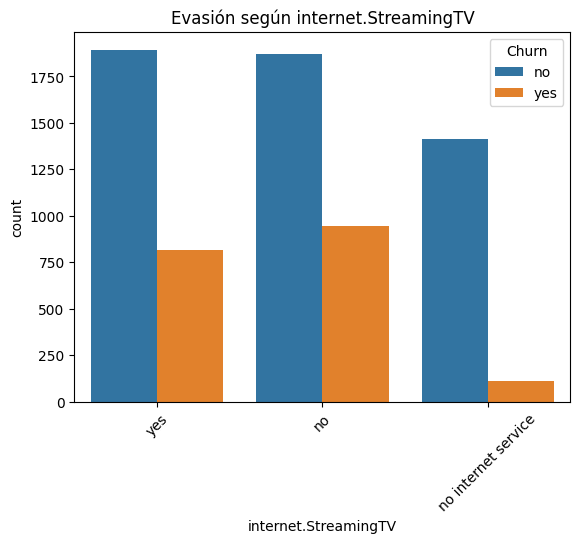

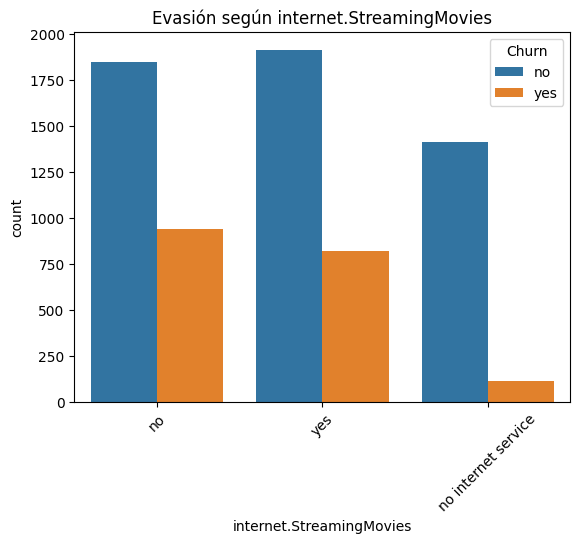

In [154]:
for col in cat_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Evasión según {col}')
    plt.xticks(rotation=45)
    plt.show()

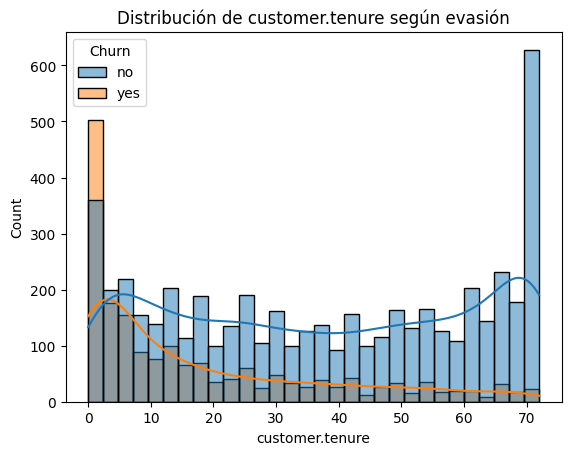

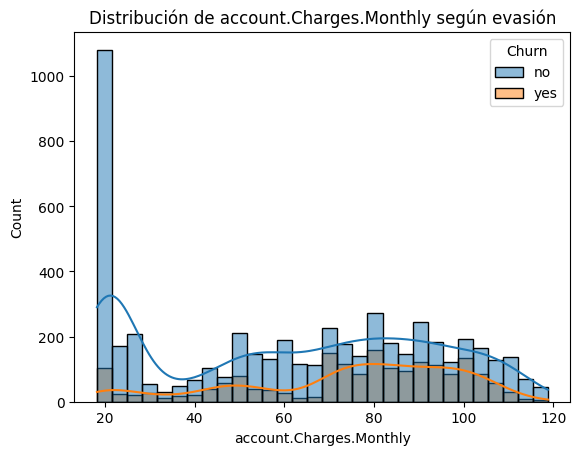

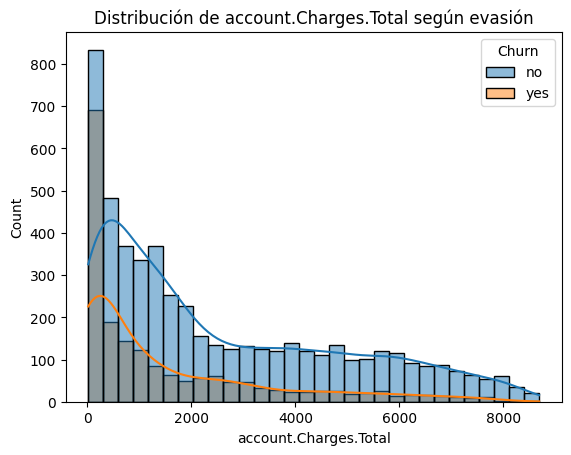

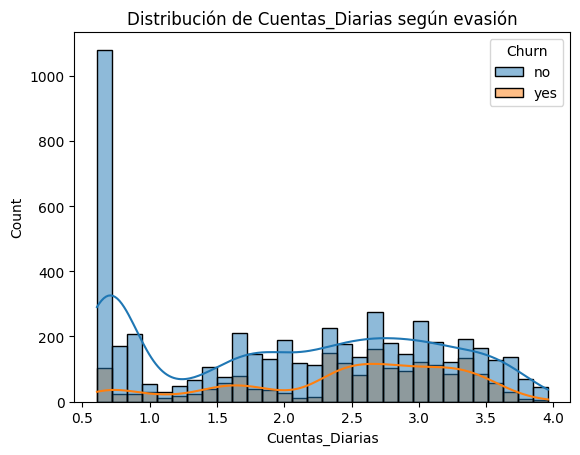

In [155]:
# ===============================
# 📊 Evasión por variables numéricas
# ===============================
num_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']
for col in num_cols:
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribución de {col} según evasión')
    plt.show()

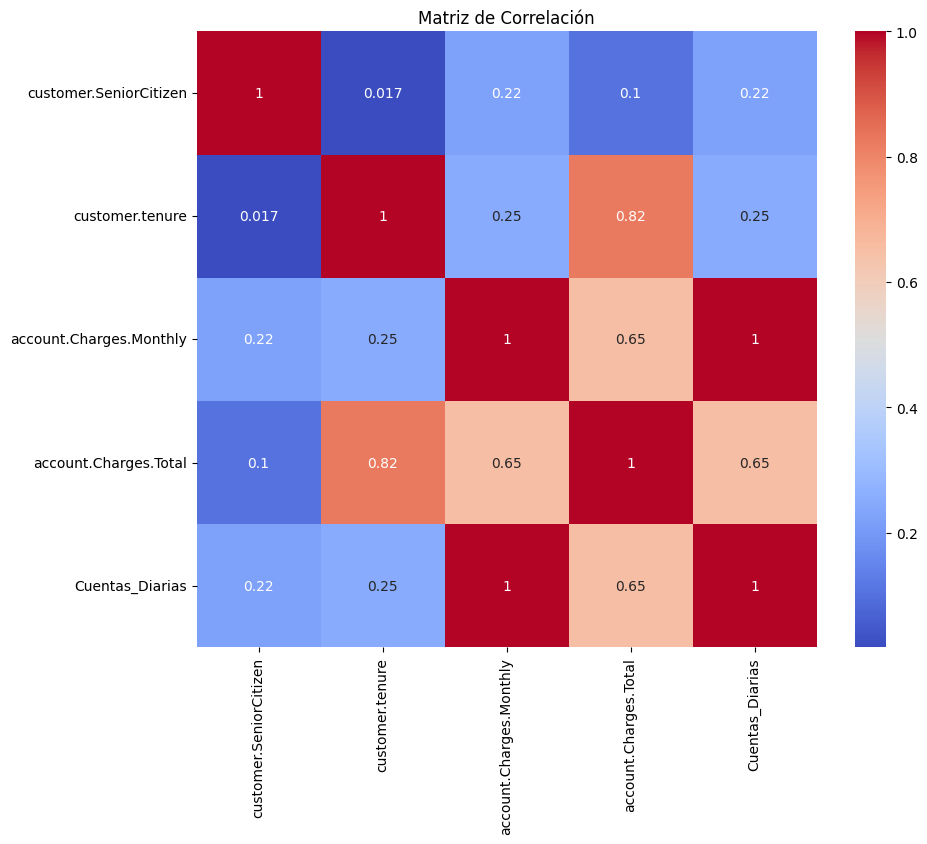

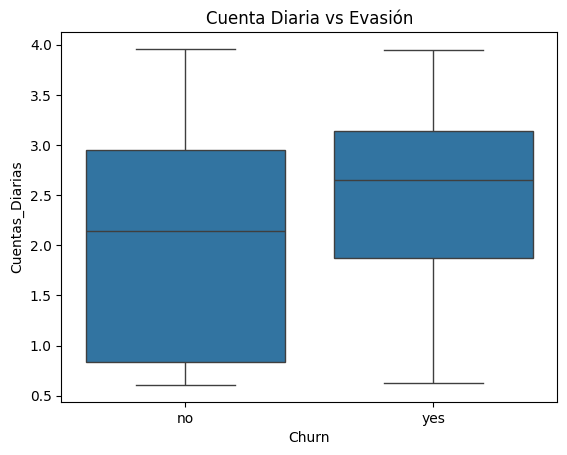

In [156]:
# ===============================
# 📌 CORRELACIÓN ENTRE VARIABLES
# ===============================
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Relación entre cuenta diaria y evasión
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df)
plt.title('Cuenta Diaria vs Evasión')
plt.show()